In [17]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

# PROBLEMA 1

In [6]:

url="https://janaf.nist.gov/tables/C-067.txt"
file=requests.get(url)
datos=file.text
datos=datos.split("\n")[3:-1]
mat=[]
for x in datos:
    s=x.split("\t")
    print(s)
    mat.append([float(a) for a in (s)])
mat=np.array(mat)

['100', '33.258', '149.500', '216.485', '-6.698', '-69.644', '-64.353', '33.615']
['200', '33.473', '172.577', '189.418', '-3.368', '-72.027', '-58.161', '15.190']
['250', '34.216', '180.113', '186.829', '-1.679', '-73.426', '-54.536', '11.395']
['298.15', '35.639', '186.251', '186.251', '0.', '-74.873', '-50.768', '8.894']
['300', '35.708', '186.472', '186.252', '0.066', '-74.929', '-50.618', '8.813']
['350', '37.874', '192.131', '186.694', '1.903', '-76.461', '-46.445', '6.932']
['400', '40.500', '197.356', '187.704', '3.861', '-77.969', '-42.054', '5.492']
['450', '43.374', '202.291', '189.053', '5.957', '-79.422', '-37.476', '4.350']
['500', '46.342', '207.014', '190.614', '8.200', '-80.802', '-32.741', '3.420']
['600', '52.227', '215.987', '194.103', '13.130', '-83.308', '-22.887', '1.993']
['700', '57.794', '224.461', '197.840', '18.635', '-85.452', '-12.643', '0.943']
['800', '62.932', '232.518', '201.675', '24.675', '-87.238', '-2.115', '0.138']
['900', '67.601', '240.205', '20

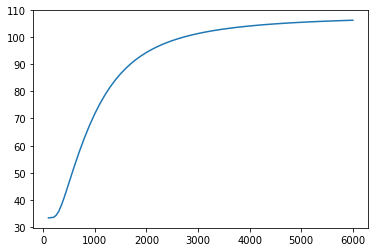

In [146]:
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()

In [147]:
#Constantes de Shomate
T=T[3:16]
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([ -0.42317857, 107.50201452, -41.34537789,   5.39384261,
         0.67123974])

In [148]:
Cp_calc=beta.dot(X.T)

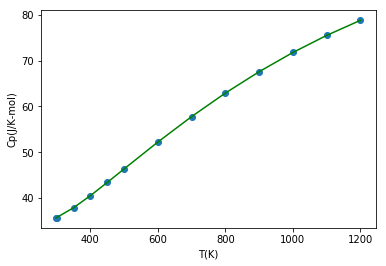

In [150]:
plt.scatter(T,y)
plt.plot(T,Cp_calc,color="green")
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.show()

In [121]:
#Datos para hacer los siguientes calculos 
A=-0.42317857
B=107.50201452
C=-41.34537789  
D=5.39384261
E=0.67123974
deltaH_298=-74.873 #kJ/mol
deltaS_298=186.251  #J/mol

In [157]:
#Calculos de Cp calc, H, S y G.
dT=0.1
T=np.arange(298,1200,dT) 
t=T/1000
Cp_CH4=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_CH4=np.cumsum(Cp_CH4*dT)+deltaH_298*1000 #para calcular delta H. se mutipica por mil porque estan en kJ/mol
deltaS_CH4=np.cumsum(Cp_CH4/T*dT)+deltaS_298
deltaG_CH4=deltaH_CH4-T*deltaS_CH4

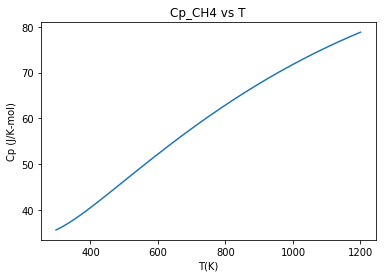

In [158]:
#grafica de T vs Cp_CH4
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T 
Cp_CH4=X.dot(beta)
plt.plot(T,Cp_CH4)
plt.title("Cp_CH4 vs T")
plt.xlabel("T(K)")
plt.ylabel("Cp (J/K-mol)")
plt.show()

[-74869.43578071 -74865.87122553 -74862.30633401 ... -21616.05736441
 -21608.1751211  -21600.29256976]


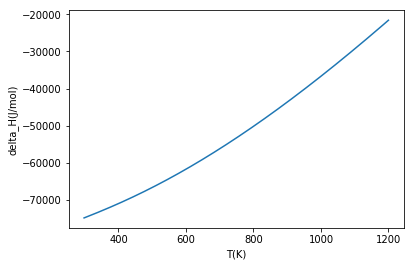

In [159]:
 #grafica de entalpia 
plt.plot(T,deltaH_CH4)
plt.xlabel("T(K)")
plt.ylabel("delta_H(J/mol)")
print(deltaH_CH4)
plt.show()

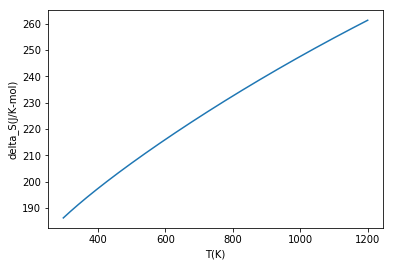

In [160]:
#grafica de S

plt.plot(T,deltaS_CH4)
plt.xlabel("T(K)")
plt.ylabel("delta_S(J/K-mol)")
plt.show()

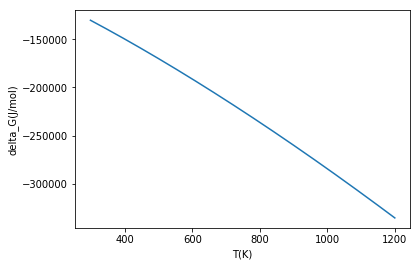

In [163]:
#grafica de G
plt.plot(T,deltaG_CH4)
plt.xlabel("T(K)")
plt.ylabel("delta_G(J/mol)")
plt.show()


# PROBLEMA 2

In [187]:
deltaS_NO=210.758
deltaS_O2=205.147
deltaS_NO2=240.034
deltaH_NO=90.291*1000
deltaH_O2=0
deltaH_NO2=33.095*1000
T=298.15 #K
pt=1 #presion total en bar
R=8.314 #J/K-mol

In [188]:
uNO_est=deltaH_NO-T*deltaS_NO
uO2_est=deltaH_O2-T*deltaS_O2
uNO2_est=deltaH_NO2-T*deltaS_NO2

print(uNO_est,uO2_est,uNO2_est)

27453.5023 -61164.57804999999 -38471.13709999999


In [195]:
x=np.arange(0.001,1,0.001)
n_NO2=x
n_NO=1-x
n_O2=0.5-0.5*x
nt=1.5-0.5*x
X_NO2=n_NO2/nt
X_NO=n_NO/nt
X_O2=n_O2/nt

In [196]:
uNO2=uNO2_est+R*T*np.log(X_NO2)
uNO=uNO_est+R*T*np.log(X_NO)
uO2=uO2_est+R*T*np.log(X_O2)
uT=n_NO2*uNO2+n_NO*uNO+n_O2*uO2+R*T*np.log(pt)

[0.999]


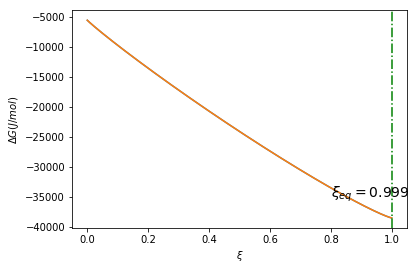

In [197]:
minimo=np.min(uT)
n=np.where(minimo==uT)
xeq=x[n]
print(xeq)
plt.plot(x,uT)
plt.plot(x,uT)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\Delta G (J/mol)$')
plt.axvline(x=xeq,color="green",linestyle="-.")
plt.text(0.8,-35000,r'$\xi_{eq}=$'+str(0.999),fontsize=14)
plt.show()

In [176]:
minimo=np.min(uT)
n=np.where(minimo==uT)
xeq=x[n]
print(xeq)

[0.999]


In [179]:
pNO2=xeq/(1.5-0.5*xeq)*pt
pNO=(1-xeq)/(1.5-0.5*xeq)*pt
pO2=(0.5-0.5*xeq)/(1.5-0.5*xeq)*pt

Kp=(pNO2)/(pNO*pO2**0.5)
print(Kp)

[44687.8059542]


# Problema 3

In [198]:
#Generar secuencia de 1000 bases nitrogenadas
from random import choice

longitud = 1000
Bases_nitrogenadas = "AGCT"

secuencia = ""
secuencia = secuencia.join([choice(Bases_nitrogenadas) for i in range(longitud)])
print(secuencia)

CTAGCATTCCATAGTTACCTGTGATGGCCTTTGAGCCTAATTTACAGAAGGGTTCAGGTAACTCGACGTCACCTCGCGGATCCTAATATGAATGACAATTTTGAGCAGTCCTTGGCATAAAAGACCCTGAGTCACGCTTCACCAGATACTCGTTGCTCAAAACCTTGCCGTTAGCCGCCTACATCAGATCGATTGCCTCACCGGAGCGATTACCCTCGTAAATTAGCCTTTAAGGAAGTCGAACAGGAAGTCAAGATATCATACACAGTCAAAAAAATTGACGGGGTGCTCGTTTACTTACCCGGGCGCACCTTCGTGGTTCCGCTCCTTGGGTACTCTTCGCCCACGTACTTAGTCTCACTAGACATCGTACCAGCTAGTCCAACATTATTCGGACGCACCGACCGGCACTCCCTCACGCTTCGCTAACCCTTCTGAGGAGTGAGACTTCGAATCGTGGTCCAATGATACACCGGGGCGATATTAAAATCTGGACTACCGAGGTATACAGCGAGTACTTCCCAGATGGCAGGATCTCAGCAAGTGTACTGTGCCCGGCCAGATGTCATATACCCCTGCTCATCTCACAATTGCCTACCTCTGTCAATTTCAGTAGGCTTACTAACTTTGCGGTAGCTACTAGAGTTGGATCAACAACTATGCGTGTGCCTCCGACATTGCTGCGTCGGACCCGACCGTCGGCTCTGTATGGGAGACATGGCCTGACGCCGCCCGTTGGTCAAGTGGTAAACCAACCGCAGAAGTATTGGCGGTTTCCATGAGCTCAACATCTCGTGTGATGTCCCGTTGACTATATTGACCCCTCGTCCACTTCAGGAACGGAAGATGAACCTGGAAGTGCTCGTCTTTTCTTTTTGAACGAATAGTAACGATTGTATCTGGCAAAATTGTATAATATTTATGGCAACAATTGCGTCAGATCAGATTTCTGGTAGTCGTATTCAGGATCCGAACGGCCTGCACTACCGAAGGCCCCTAT

In [199]:
#Cantidad de cada base nitrogenada en la secuencia 
A=secuencia.count("A")
A

247

In [200]:
G=secuencia.count("G")
G

225

In [201]:
C=secuencia.count("C")
C

267

In [202]:
T=secuencia.count("T")
T

261

In [203]:
x=[A,G,C,T]

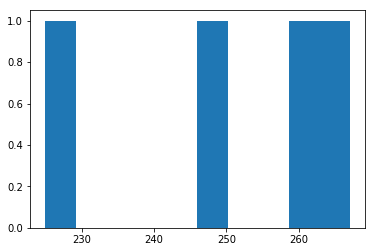

In [204]:
plt.hist(x)
plt.show()